In [ ]:
%cd /content/
!git clone https://github.com/tensorflow/models.git

/content
Cloning into 'models'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (319/319), done.
remote: Compressing objects: 100% (280/280), done.
remote: Total 53349 (delta 56), reused 299 (delta 39), pack-reused 53030
Receiving objects: 100% (53349/53349), 570.00 MiB | 35.11 MiB/s, done.
Resolving deltas: 100% (36393/36393), done.


In [ ]:
!kill -9 -1

In [ ]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
# way1
# !python -m pip install --use-feature=2020-resolver .
# way2
# !pip install --use-feature=2020-resolver --upgrade aws-cdk.aws-sns-subscriptions
# way3
!pip install --upgrade pip
!pip install --upgrade pip==20.3
!pip install --use-feature=2020-resolver --upgrade aws-cdk.aws-sns-subscriptions

In [ ]:
%cd /content/
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
 
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
 
 
import datetime
import json
import os
import pprint
import random
import string
import sys
import tensorflow as tf

In [2]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# source code in github main
%cd /content/
!cp -R /content/drive/MyDrive/ARGAN-Temp/Artifact_Removal_GAN/ /content/
if not 'Artifact_Removal_GAN' in sys.path:
  sys.path += ['Artifact_Removal_GAN']
%cd Artifact_Removal_GAN/
!mkdir models
!wget -P /content/Artifact_Removal_GAN/models/ https://github.com/mameli/Artifact_Removal_GAN/releases/download/1.1/standard.pkl

In [7]:
!rm -R /content/Artifact_Removal_GAN/

In [ ]:
# source code in release (v1.1)
import sys
%cd /content/
!wget -P /content/ https://github.com/mameli/Artifact_Removal_GAN/archive/1.1.zip
!unzip 1.1.zip
!rm 1.1.zip

if not 'Artifact_Removal_GAN-1.1' in sys.path:
  sys.path += ['Artifact_Removal_GAN-1.1']

%cd Artifact_Removal_GAN-1.1/
!mkdir models
!wget -P /content/Artifact_Removal_GAN-1.1/models/ https://github.com/mameli/Artifact_Removal_GAN/releases/download/1.1/standard.pkl

In [3]:
!rm -R /content/Artifact_Removal_GAN-1.1/

In [ ]:
!conda env create -f environment.yml python=3.7

In [ ]:
!conda env update --name arnet_env --file environment.yml

In [ ]:
!pip install --use-feature=2020-resolver --upgrade aws-cdk.aws-sns-subscriptions

In [ ]:
!conda env remove -n arnet_env

In [ ]:
%cd /content/

In [ ]:
%cd /content/Artifact_Removal_GAN/

In [ ]:
!python3.7 -m pip install nvidia-ml-py3
!python3.7 -m pip install fastai==1.0.61
!python3.7 -m pip install lpips==0.1
!sudo apt-get install libsvm-dev
!python3.7 -m pip install sk-video
!python3.7 -m pip install geffnet
!sudo apt-get update
!sudo apt-get upgrade

In [ ]:
%%bash
conda list

In [ ]:
!rm -R /content/models/

In [5]:
import os
import sys
os.environ['CUDA_VISIBLE_DEVICES']='1'

from fastai import *
from fastai.vision import *
torch.backends.cudnn.benchmark=True


In [6]:
# root_model_path = Path("./models/")
# exported_model = Path("standard.pkl")
root_model_path = "./models/"
exported_model = "standard.pkl"
learner = load_learner (path=root_model_path, file=exported_model)

In [7]:
!pwd

/content/Artifact_Removal_GAN-1.1


In [8]:
def toEven(sz):
    tempSz = [sz[0], sz[1]]
    if sz[0]%2 != 0:
        tempSz[0] += 1
    if sz[1]%2 != 0:
        tempSz[1] += 1
    return tempSz

def get_dummy_databunch(bs: int, sz: int):
    """Returns sz databunch
    """
    path = Path('./dummy_data/')
    src = ImageImageList.from_folder(path).split_none()

    data = (src.label_from_func(
        lambda x: path/(x.name.replace(".jpg", ".png"))
    ).transform(
        size=sz,
        tfm_y=True
    ).databunch(bs=bs, num_workers=1, no_check=True)
        .normalize(imagenet_stats, do_y=True))
    data.c = 3
    return data

In [ ]:
img_low = open_image("./imgs/0416_base.jpg")
img_size = toEven(img_low.size)
data_gen = get_dummy_databunch(1, img_size)
learner.data = data_gen
p,img_hr,b = learner.predict(img_low)

In [10]:
p

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img_hr

In [ ]:
%%bash
source activate arnet_env

python3.7
import os
import sys
os.environ['CUDA_VISIBLE_DEVICES']='1'

from fastai import *
from fastai.vision import *
torch.backends.cudnn.benchmark=True

# root_model_path = Path("./models/")
# exported_model = Path("standard.pkl")
root_model_path = "./models/"
exported_model = "standard.pkl"
learner = load_learner (path=root_model_path, file=exported_model)

def toEven(sz):
    tempSz = [sz[0], sz[1]]
    if sz[0]%2 != 0:
        tempSz[0] += 1
    if sz[1]%2 != 0:
        tempSz[1] += 1
    return tempSz

def get_dummy_databunch(bs: int, sz: int):
    """Returns sz databunch
    """
    path = Path('./dummy_data/')
    src = ImageImageList.from_folder(path).split_none()

    data = (src.label_from_func(
        lambda x: path/(x.name.replace(".jpg", ".png"))
    ).transform(
        size=sz,
        tfm_y=True
    ).databunch(bs=bs, num_workers=1, no_check=True)
        .normalize(imagenet_stats, do_y=True))
    data.c = 3
    return data


img_low = open_image("./imgs/0803_base.jpg")
img_size = toEven(img_low.size)
data_gen = get_dummy_databunch(1, img_size)
learner.data = data_gen
p,img_hr,b = learner.predict(img_low)
p
img_hr
b
# learner.predict(img_low)

tcmalloc: large alloc 1426063360 bytes == 0x558445390000 @  0x7f6d8c310b6b 0x7f6d8c330379 0x7f6d0ed4025e 0x7f6d0ed419d2 0x7f6d4c5e4443 0x7f6d4bde8bef 0x7f6d4c59607a 0x7f6d4bbc8eba 0x7f6d4bbc9eb2 0x7f6d4c38306b 0x7f6d4c259468 0x7f6d4d8d6eb8 0x7f6d4d8d761a 0x7f6d4c259468 0x7f6d4bbc88d9 0x7f6d4c4954eb 0x7f6d4c4a6ee2 0x7f6d4c258340 0x7f6d4bbbe4c9 0x7f6d4c47b778 0x7f6d4c4a67b3 0x7f6d4c178db4 0x7f6d4bbc3ca5 0x7f6d4c47b546 0x7f6d4c4a6299 0x7f6d4c17786e 0x7f6d4bbbdaf6 0x7f6d4c47b407 0x7f6d4c4a6632 0x7f6d4c2e7efe 0x7f6d4c176869
tcmalloc: large alloc 1426063360 bytes == 0x55849a390000 @  0x7f6d8c310b6b 0x7f6d8c330379 0x7f6d0ed4025e 0x7f6d0ed419d2 0x7f6d4ba00ad6 0x7f6d4be62ff9 0x7f6d4c36d39a 0x7f6d4c338b19 0x7f6d4c2ef277 0x7f6d4c193549 0x7f6d4be6c8c2 0x7f6d4c46a4a2 0x7f6d4c2f0229 0x7f6d4c195a9e 0x7f6d4be6d3fd 0x7f6d4c36ed7e 0x7f6d4c1f6232 0x7f6d4da5f65a 0x7f6d4da5f8ae 0x7f6d4c5ad5c2 0x7f6d4be803f4 0x7f6d4c46a9b2 0x7f6d4c2db570 0x7f6d4c58c1d6 0x7f6d4bd43a3a 0x7f6d4c485408 0x7f6d4c48544f 0x7f6d4c2e

In [ ]:
def get_DIV2k_data_QF(pLow, bs:int, sz:int):
    """Given the path of low resolution images
       returns a databunch
    """
    src = ImageImageList.from_folder(pLow).split_by_idxs(train_idx=list(range(0,800)), valid_idx=list(range(800,900)))
    
    data = (src.label_from_func(lambda x: path_fullRes/(x.name.replace(".jpg", ".png"))).transform(
            get_transforms(
                max_rotate=30,
                max_lighting=.4,
                max_warp=.4
            ),
            size=sz,
            tfm_y=True,
        ).databunch(bs=bs, num_workers=8, no_check=True).normalize(imagenet_stats, do_y=True))
    data.c = 3
    return data

  

In [ ]:
def do_fit(learn, epochs,save_name, lrs=slice(1e-3), pct_start=0.9):
    learn.fit_one_cycle(epochs, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=1, imgsize=7)

In [ ]:
path = Path('./dataset/')

path_fullRes = path/'DIV2K_train_HR'

path_lowRes_256 = path/'DIV2K_train_LR_256_QF20'
path_lowRes_512 = path/'DIV2K_train_LR_512_QF20'
path_lowRes_Full = path/'DIV2K_train_LR_Full_QF20'

proj_id = 'unet_superRes_mobilenetV3_SSIM'

gen_name = proj_id + '_gen'
crit_name = proj_id + '_crit'

nf_factor = 2
pct_start = 1e-8

In [ ]:
print(path_fullRes)

dataset/DIV2K_train_HR


# Test metric values

In [ ]:
pathLenna = path / "Lenna_imgs"

In [ ]:
pathLenna.ls()

[PosixPath('dataset/Lenna_imgs/Lenna_jpeg.jpg'),
 PosixPath('dataset/Lenna_imgs/Lenna_invese.png'),
 PosixPath('dataset/Lenna_imgs/Lenna_warp.png'),
 PosixPath('dataset/Lenna_imgs/Lenna_Blur.png'),
 PosixPath('dataset/Lenna_imgs/Lenna_Noise.png'),
 PosixPath('dataset/Lenna_imgs/Lenna_original.png')]

In [ ]:
lenna_original = open_image("dataset/Lenna_imgs/Lenna_original.png")
lenna_warp = open_image("dataset/Lenna_imgs/Lenna_warp.png")
lenna_blur = open_image("dataset/Lenna_imgs/Lenna_Blur.png")
lenna_jpeg = open_image("dataset/Lenna_imgs/Lenna_jpeg.jpg")
lenna_noise = open_image("dataset/Lenna_imgs/Lenna_Noise.png")

print(lenna_original.data.size())

torch.Size([3, 512, 512])


In [ ]:
noise_tensor = torch.empty(3, 512,512).uniform_(0, 1)

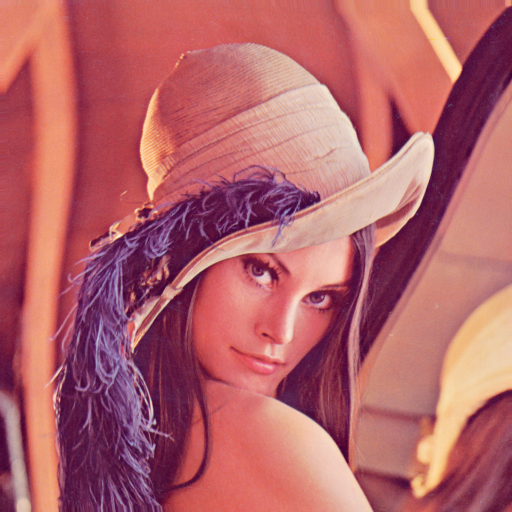

In [ ]:
lenna_warp

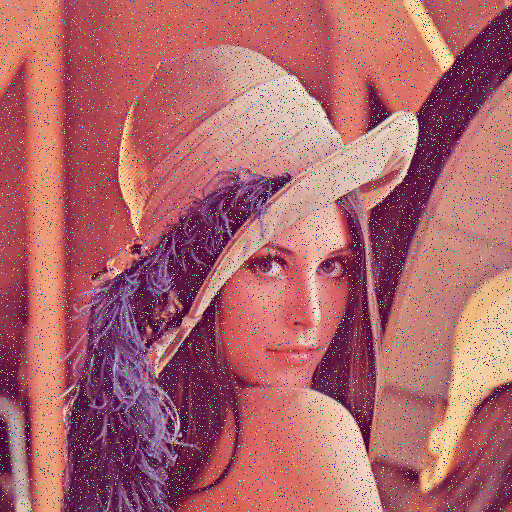

In [ ]:
lenna_noise

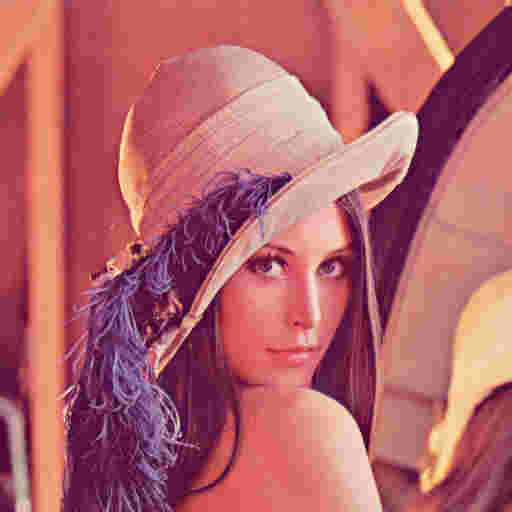

In [ ]:
lenna_jpeg

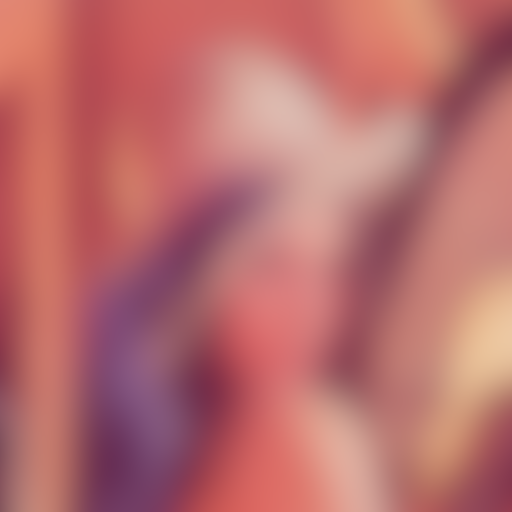

In [ ]:
lenna_blur

In [ ]:
lpips_metric = lpips.PerceptualLoss(model='net-lin', net='alex', use_gpu=True, gpu_ids=[0])

Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done


### originale

In [ ]:
1 - ssim(lenna_original.data[None], lenna_original.data[None])

tensor(1.)

In [ ]:
lpips_metric(lenna_original.data, lenna_original.data)

tensor([[[[0.]]]], device='cuda:0', grad_fn=<AddBackward0>)

### warp

In [ ]:
1 - ssim(lenna_original.data[None], lenna_warp.data[None])

tensor(0.4273)

In [ ]:
(1 - lpips_metric(lenna_original.data, lenna_warp.data))/1.27

tensor([[[[0.5239]]]], device='cuda:0', grad_fn=<DivBackward0>)

### blur

In [ ]:
1 - ssim(lenna_original.data[None], lenna_blur.data[None])

tensor(0.5479)

In [ ]:
(1 - lpips_metric(lenna_original.data, lenna_blur.data))/1.27

tensor([[[[0.2965]]]], device='cuda:0', grad_fn=<DivBackward0>)

### jpeg

In [ ]:
1 - ssim(lenna_original.data[None], lenna_jpeg.data[None])

tensor(0.7322)

In [ ]:
lpips_metric(lenna_original.data, lenna_jpeg.data)

tensor([[[[0.1576]]]], device='cuda:0', grad_fn=<AddBackward0>)

### Noise

In [ ]:
1 - ssim(lenna_original.data[None], lenna_noise.data[None])

tensor(0.3105)

In [ ]:
(1 - lpips_metric(lenna_original.data, lenna_noise.data))/1.27

tensor([[[[0.3330]]]], device='cuda:0', grad_fn=<DivBackward0>)

In [ ]:
from brisque import BRISQUE

brisque_metric = BRISQUE()

In [ ]:
# brisque takes tensors with (w x h x channel) shape
brisque_metric.get_score(lenna_noise.data.permute(1, 2, 0).numpy())

97.44369836360227

In [ ]:
from skvideo.measure.niqe import niqe

In [ ]:
niqe(lenna_noise.data.numpy())

array([24.395811, 24.113686, 23.30163 ], dtype=float32)

# LPIPS batch

In [ ]:
bs=10
sz=256
lr = 1e-2
wd = 1e-3
epochs = 1

data_gen = get_DIV2k_data_QF(path_lowRes_128, bs=bs, sz=sz)

x, y = data_gen.one_batch()

In [ ]:
mod = lpips.PerceptualLoss(model='net-lin', net='alex', use_gpu=True, gpu_ids=[0])
d = mod.forward(x,y);

Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done


In [ ]:
d.size()

torch.Size([10, 1, 1, 1])

In [ ]:
d.mean()

tensor(0.3810, device='cuda:0', grad_fn=<MeanBackward0>)

# Brisque

In [ ]:
from brisque import BRISQUE

In [ ]:
brisque = BRISQUE()

In [ ]:
x[0].shape

torch.Size([3, 256, 256])

In [ ]:
x[0].permute(1, 2, 0).numpy().shape

(256, 256, 3)

In [ ]:
brisque.get_score(x[0].permute(1, 2, 0).numpy())

119.10616952020843

# NIQE

In [ ]:
from skvideo.measure.niqe import *
from torchvision import transforms

In [ ]:
x[0][0].shape

torch.Size([256, 256])

In [ ]:
values = []
for img in x:
    score = niqe(img[0].numpy())
    values.append(score)
values

[array([27.152546], dtype=float32),
 array([25.214308], dtype=float32),
 array([25.914682], dtype=float32),
 array([25.328392], dtype=float32),
 array([25.09236], dtype=float32),
 array([25.201395], dtype=float32),
 array([25.408411], dtype=float32),
 array([26.829681], dtype=float32),
 array([26.346024], dtype=float32),
 array([27.180517], dtype=float32)]

In [ ]:
niqe(x[0][0].numpy())

array([27.152546], dtype=float32)

# Test fit with metrics

In [ ]:
bs=40
sz=32
lr = 1e-2
wd = 1e-3
epochs = 1

model = geffnet.mobilenetv3_small_minimal_100

loss_func = F.mse_loss

loss_func = F.mse_loss

In [ ]:
learn_gen = gen_learner_wide(data=data_gen,
                             gen_loss=loss_func,
                             arch = model,
                             nf_factor=nf_factor)

In [ ]:
data_gen = get_DIV2k_data_QF(path_lowRes_128, path_fullRes, bs=10, sz=256)

In [ ]:
learn_gen = gen_learner_wide(data=data_gen,
                             gen_loss=loss_func,
                             arch = model,
                             nf_factor=nf_factor)

In [ ]:
learn_gen.metrics.append(LPIPS_Metric_gen())
learn_gen.metrics.append(LPIPS_Metric_input())
learn_gen.metrics.append(BRISQUE_Metric_gen())
learn_gen.metrics.append(BRISQUE_Metric_input())
learn_gen.metrics.append(BRISQUE_Metric_target())
learn_gen.metrics.append(NIQE_Metric_gen())
learn_gen.metrics.append(NIQE_Metric_input())
learn_gen.metrics.append(NIQE_Metric_target())

Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done
Setting up Perceptual loss...
Loading model from: /data/students_home/fmameli/anaconda3/envs/fastai/lib/python3.6/site-packages/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done


In [ ]:
learn_gen.metrics

[LPIPS_Metric_gen,
 LPIPS_Metric_input,
 BRISQUE_Metric_gen,
 BRISQUE_Metric_input,
 BRISQUE_Metric_target,
 NIQE_Metric_gen,
 NIQE_Metric_input,
 NIQE_Metric_target]

In [ ]:
learn_gen.fit_one_cycle(1, lr, pct_start=.9)

# Test architectures

In [ ]:
data_gen = get_DIV2k_data_QF(path_lowRes_512, path_fullRes, bs=10, sz=256)

In [ ]:
mobile = geffnet.mobilenetv3_small_minimal_100

In [ ]:
dir(geffnet)

['F',
 'GenEfficientNet',
 'HardSigmoid',
 'HardSwish',
 'Mish',
 'MishAuto',
 'MishJit',
 'Sigmoid',
 'Swish',
 'SwishAuto',
 'SwishJit',
 'Tanh',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'activations',
 'activations_autofn',
 'activations_jit',
 'add_override_act_fn',
 'add_override_act_layer',
 'clear_override_act_fn',
 'clear_override_act_layer',
 'config',
 'conv2d_layers',
 'create_model',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_builder',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_l2',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'fbnetc_100',
 'gen_efficientnet',


In [ ]:
learn_gen = gen_learner_wide(data=data_gen, arch=mobile, gen_loss=SSIM, nf_factor=1)

learn_gen.summary()

DynamicUnetWide
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [16, 128, 128]       432        False     
______________________________________________________________________
BatchNorm2d          [16, 128, 128]       32         True      
______________________________________________________________________
ReLU                 [16, 128, 128]       0          False     
______________________________________________________________________
Conv2d               [16, 64, 64]         144        False     
______________________________________________________________________
BatchNorm2d          [16, 64, 64]         32         True      
______________________________________________________________________
ReLU                 [16, 64, 64]         0          False     
______________________________________________________________________
Identity             [16, 64, 64]         0          False     
______________________________________________

In [ ]:
res = models.resnet34

print(res.__module__)
help(res)

torchvision.models.resnet
Help on function resnet34 in module torchvision.models.resnet:

resnet34(pretrained=False, progress=True, **kwargs)
    ResNet-34 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr



In [ ]:
learn_gen = gen_learner_wide(data=data_gen, arch=res, gen_loss=msssim, nf_factor=2)

learn_gen.summary()

DynamicUnetWide
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________

In [ ]:
shuffle = models.shufflenet_v2_x2_0 # Not supported 
print(type(shuffle))
help(shuffle)

<class 'function'>
Help on function shufflenet_v2_x2_0 in module torchvision.models.shufflenetv2:

shufflenet_v2_x2_0(pretrained=False, progress=True, **kwargs)
    Constructs a ShuffleNetV2 with 2.0x output channels, as described in
    `"ShuffleNet V2: Practical Guidelines for Efficient CNN Architecture Design"
    <https://arxiv.org/abs/1807.11164>`_.
    
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr



In [ ]:
efficient = geffnet.efficientnet_b1
print(type(efficient))
help(efficient)

<class 'function'>
Help on function efficientnet_b1 in module geffnet.gen_efficientnet:

efficientnet_b1(pretrained=False, **kwargs)
    EfficientNet-B1



In [ ]:
learn_gen = gen_learner_wide(data=data_gen, arch=efficient, gen_loss=msssim, nf_factor=2)

learn_gen.summary()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b1-533bc792.pth" to /data/students_home/fmameli/.cache/torch/checkpoints/efficientnet_b1-533bc792.pth


DynamicUnetWide
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [32, 128, 128]       864        False     
______________________________________________________________________
BatchNorm2d          [32, 128, 128]       64         True      
______________________________________________________________________
SwishJit             [32, 128, 128]       0          False     
______________________________________________________________________
Conv2d               [32, 128, 128]       288        False     
______________________________________________________________________
BatchNorm2d          [32, 128, 128]       64         True      
______________________________________________________________________
SwishJit             [32, 128, 128]       0          False     
______________________________________________________________________
AdaptiveAvgPool2d    [32, 1, 1]           0          False     
______________________________________________

# Dataset setup

Create QF20 jpeg imgs

In [ ]:
path = Path('./dataset/')

path_fullRes = path/'DIV2K_train_HR'

path_lowRes_256 = path/'DIV2K_train_LR_256_QF20'
path_lowRes_512 = path/'DIV2K_train_LR_512_QF20'
path_lowRes_1024 = path/'DIV2K_train_LR_1024_QF20'
path_lowRes_Full = path/'DIV2K_train_LR_Full_QF20'

In [ ]:
path_fullRes_mixed = path/'DIV2K_Flickr_Mixed_HR'


path_lowRes_512_mixed = path/'DIV2K_Flickr_Mixed_LR_512_QF20'
path_lowRes_1024_mixed = path/'DIV2K_Flickr_Mixed_LR_1024_QF20'

In [ ]:
datasets = [(path_lowRes_256, 256, 20), (path_lowRes_512, 512, 20)]

In [ ]:
create_dataset(path_fullRes, datasets, downsize=True)

In [ ]:
datasets = [(path_lowRes_1024, 1024, 20)]

In [ ]:
create_dataset(path_fullRes, datasets, downsize=True)

In [ ]:
datasets = [(path_lowRes_Full, 0, 20)]

In [ ]:
create_dataset(path_fullRes, datasets, downsize=False)

# Mixed with ffhd

In [ ]:
datasets = [(path_lowRes_1024_mixed, 1024, 20), (path_lowRes_512_mixed, 512, 20)]

In [ ]:
create_dataset(path_fullRes_mixed, datasets, downsize=True)

Creating dataset/DIV2K_Flickr_Mixed_LR_1024_QF20
Size: 1024 with 20 quality factor


Creating dataset/DIV2K_Flickr_Mixed_LR_512_QF20
Size: 512 with 20 quality factor


# Flickr2k

In [ ]:
path_fullRes_flickr = path/'Flickr2K'/'Flickr2K_HR'

path_lowRes_flickr_512 = path/'Flickr2K'/'Flickr2K_LR_512_QF20'
path_lowRes_flickr_1024 = path/'Flickr2K'/'Flickr2K_LR_1024_QF20'

datasets = [(path_lowRes_flickr_512, 512, 20), (path_lowRes_flickr_1024, 1024, 20)]

In [ ]:
create_dataset(path_fullRes_flickr, datasets, downsize=True)

Creating dataset/Flickr2K/Flickr2K_LR_512_QF20
Size: 512 with 20 quality factor


Creating dataset/Flickr2K/Flickr2K_LR_1024_QF20
Size: 1024 with 20 quality factor


# Test FID

In [ ]:
from superRes.fid_loss import *

In [ ]:
x, y = data_gen.one_batch()

In [ ]:
x.shape

torch.Size([10, 3, 256, 256])

In [ ]:
fid(x, y)

tensor(0.2551, device='cuda:0', grad_fn=<AddBackward0>)

# View img patches

In [ ]:
path = Path('./dataset/')

path_fullRes = path/'DIV2K_train_HR'

path_lowRes_256 = path/'DIV2K_train_LR_256_QF20'
path_lowRes_512 = path/'DIV2K_train_LR_512_QF20'
path_lowRes_1k = path/'DIV2K_train_LR_1024_QF20'
path_lowRes_Full = path/'DIV2K_train_LR_Full_QF20'

In [ ]:
def plot_patched_image(p):
    _, axs = plt.subplots(p.shape[0], p.shape[1], figsize=(10, 10))
    for i in range(p.shape[0]):
        for j in range(p.shape[1]):
            Image(p[i][j]).show(ax=axs[i, j])

def get_patches(tensor):
    pw, ph = 64, 64
    nc, w, h = tensor.shape
    padW = pw - w%pw
    padH = ph - h%ph
    paded = F.pad(tensor, (padH, 0, padW, 0), value=1)
    patches = paded.unfold(0, nc, nc).unfold(1, ph, ph).unfold(2, pw, pw)
    return patches

In [ ]:
high_res = ImageList.from_folder(path_fullRes, presort=True)
# low_res  = ImageList.from_folder(path_lowRes_Full, presort=True)
low_res  = ImageList.from_folder(path_lowRes_1k, presort=True)

print(low_res[10].shape)
print(high_res[10].shape)

torch.Size([3, 1024, 1540])
torch.Size([3, 1356, 2040])


In [ ]:
index = 6
resizedImg = low_res[index].resize(high_res[index].shape).clone()

In [ ]:
resizedImg.shape == high_res[index].shape

True

torch.Size([22, 32, 3, 64, 64])


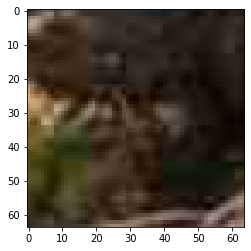

In [ ]:
patch_img = get_patches(resizedImg.data)[0]
print(patch_img.shape)
plt.imshow(patch_img[17][26].permute(1, 2, 0), interpolation='nearest')
# plot_patched_image(patch_img)

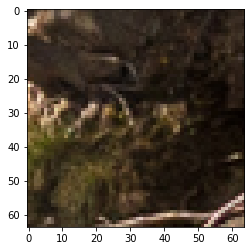

In [ ]:
patch_img = get_patches(high_res[index].data)[0]
patch_img[4][2].shape
plt.imshow(patch_img[17][26].permute(1, 2, 0), interpolation='nearest')
# plot_patched_image(patch_img)